# importing libries

In [1]:

import tensorflow as tf                                                        #the main engine handling the nueral network 
import pandas as pd                                                            #for loading the csv dataset files
import numpy as np                                                             #for numpy array functions
from sklearn.preprocessing import StandardScaler, LabelEncoder                 #for normalizing the data set
from keras.utils import np_utils
import matplotlib.pyplot as plt                                                #for ploting the loss graphs
from sklearn.metrics import ConfusionMatrixDisplay                             #for formating the distplay of the cm
from sklearn.metrics import confusion_matrix                                   #ploting the confussion matrix



## loading the datasets

In [2]:
train_data = pd.read_csv('datasets/training.csv', header = None).values        #train data set
test_data = pd.read_csv('datasets/testing.csv', header = None ).values         #test data set


In [18]:
train_data

array([[1, 1, 1, ..., 0, 0, 'Fungal infection'],
       [0, 1, 1, ..., 0, 0, 'Fungal infection'],
       [1, 0, 1, ..., 0, 0, 'Fungal infection'],
       ...,
       [0, 0, 0, ..., 0, 0, 'Urinary tract infection'],
       [0, 1, 0, ..., 0, 0, 'Psoriasis'],
       [0, 1, 0, ..., 1, 1, 'Impetigo']], dtype=object)

## spliting the data into x_train, x_test, y_tring, y_test

In [3]:
x_train, y_train = train_data[:,0:-1].astype(float), train_data[:,-1]
x_test, y_test = test_data[:,0:-1].astype(float), test_data[:,-1]
N,D = x_train.shape                                                            #shape of x to pass later in the model

In [4]:
x_test[0]

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## encoding the output variable 



In [5]:
#encoding the labels to numbers

encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
train_encoded_y = encoder.transform(y_train)
test_encoded_y = encoder.transform(y_test)

#filling in the dummy values

y_train_dummy = np_utils.to_categorical(train_encoded_y)
y_test_dummy = np_utils.to_categorical(test_encoded_y)

In [6]:
y_train_dummy


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## building the model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(D, )),                         
    tf.keras.layers.Dense(254, activation = tf.nn.relu),
    tf.keras.layers.Dense(41, activation = tf.nn.softmax),
    
    
    
]);

model.compile (optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 132)               0         
                                                                 
 dense (Dense)               (None, 254)               33782     
                                                                 
 dense_1 (Dense)             (None, 41)                10455     
                                                                 
Total params: 44,237
Trainable params: 44,237
Non-trainable params: 0
_________________________________________________________________


## training the model

In [8]:

r =model.fit(x_train, y_train_dummy, validation_split = .2, epochs = 1)

score, acc  = model.evaluate(x_test, y_test_dummy)

print("accuracy: ",acc,", score:", score)

2/2 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 1.0000
accuracy:  1.0 , score: 0.09938153624534607


## visualizing the result of the training

2/2 [==============================] - 0s 3ms/step


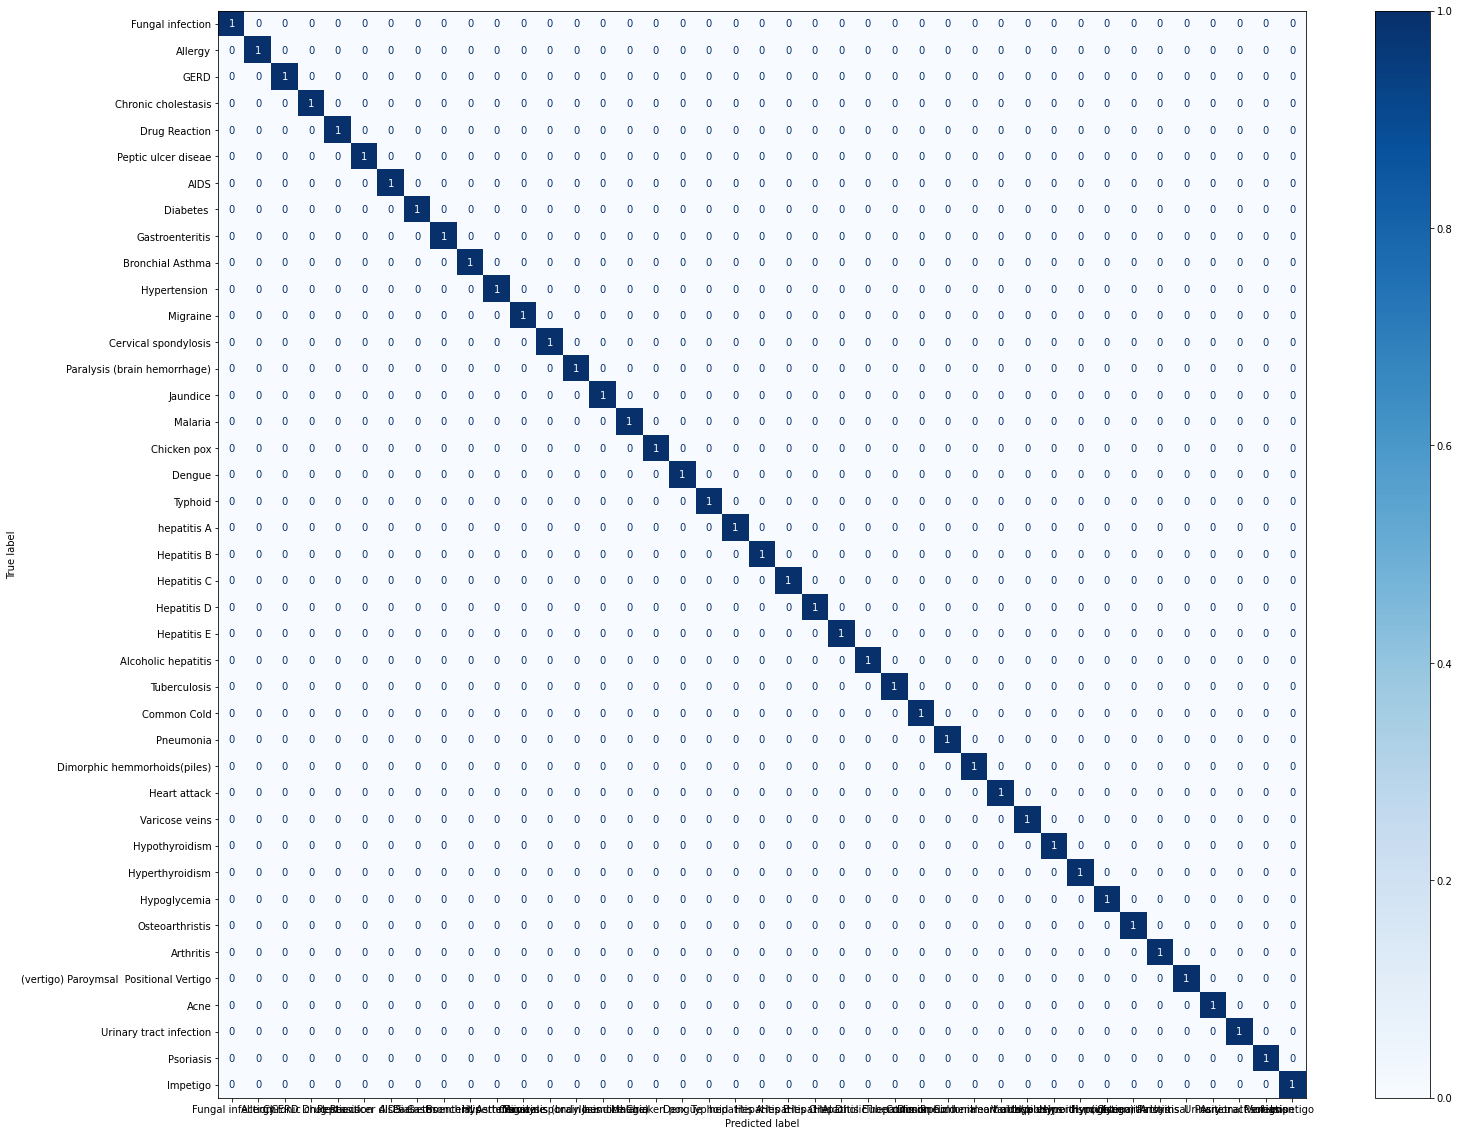

In [17]:
#increasing plot size
plt.rcParams["figure.figsize"] = (25,20)

#running the classification tests
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_pred, axis=1)

#plotting the confussion matrix
cm = confusion_matrix(test_encoded_y, y_test_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test)

#displaying the plot
disp.plot(cmap=plt.cm.Blues)
plt.show()

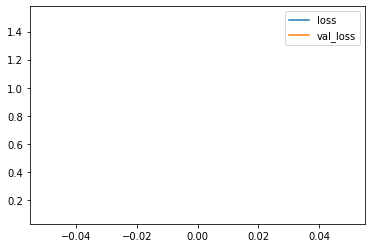

In [10]:
plt.plot(r.history["loss"], label ="loss")
plt.plot(r.history["val_loss"],label = "val_loss")
plt.legend()

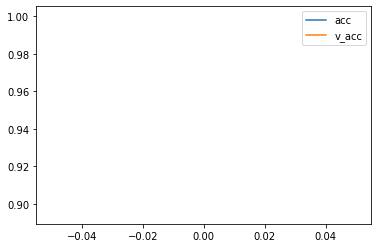

In [11]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label="v_acc")
plt.legend()

## saving the model

In [12]:
# model.save("medical_prognosis.h5")

## loading the model

In [13]:
import tensorflow as tf
model = tf.keras.models.load_model('medical_prognosis.h5')
# print(model.summary())


## running a test prediction

In [14]:
import numpy as np

pred =model.predict(np.zeros((1,132)).astype(float))
result =np.argmax(pred, axis=1)
print(result)

1/1 [==============================] - 0s 48ms/step
[18]
